In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

In [125]:
# Reading the final file
df = pd.read_csv('nba_player_performance_per_season_with_salaries.csv')
df.head(3)

,Unnamed: 0,PLAYER_ID,RANK,PLAYER,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,career_WS,career_eFG%,draft_year,height,name,position,weight,salary,season_end,season_start
0,0,893,1,Michael Jordan,82,3144,837,1625,0.515,9,...,214.0,50.9,1984.0,6-6,Michael Jordan,Small Forward and Shooting Guard,195lb,550000.0,1985.0,1984.0
1,1,78615,14,Orlando Woolridge,77,2816,679,1225,0.554,0,...,53.0,51.4,1981.0,6-9,Orlando Woolridge,Small Forward,215lb,300000.0,1985.0,1984.0
2,2,76497,49,Quintin Dailey,79,2101,525,1111,0.473,7,...,12.7,45.6,1982.0,6-3,Quintin Dailey,Shooting Guard,180lb,410000.0,1985.0,1984.0


In [126]:
# Dropping an unnecessary Unnamed column created by the csv file
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [127]:
# There are several cases where a player has more than one position.
print(df['position'].unique())

['Small Forward and Shooting Guard' 'Small Forward' 'Shooting Guard'
 'Center' nan 'Point Guard' 'Power Forward and Small Forward'
 'Center and Power Forward' 'Power Forward and Center'
 'Shooting Guard and Small Forward' 'Small Forward and Power Forward'
 'Point Guard and Shooting Guard' 'Power Forward'
 'Shooting Guard and Point Guard'
 'Shooting Guard and Small Forward and Point Guard'
 'Shooting Guard and Point Guard and Small Forward'
 'Small Forward and Center and Power Forward'
 'Small Forward and Shooting Guard and Power Forward'
 'Power Forward and Center and Small Forward'
 'Small Forward and Power Forward and Center'
 'Power Forward and Shooting Guard and Small Forward'
 'Point Guard and Small Forward and Shooting Guard'
 'Small Forward and Shooting Guard and Point Guard'
 'Center and Small Forward and Power Forward'
 'Small Forward and Power Forward and Shooting Guard'
 'Shooting Guard and Small Forward and Power Forward'
 'Center and Power Forward and Small Forward' 'Small

In [128]:
# We want to work only with the five positions in the court. Here we extract the player's first position and we determine it to be the "main" one:
print(df['position'].head)
df["main_position"] = df["position"].apply((lambda x: str(x).split(' and ')[0]))
print(df["main_position"])

<bound method NDFrame.head of 0        Small Forward and Shooting Guard
1                           Small Forward
2                          Shooting Guard
3                                  Center
4                                  Center
                       ...               
14501                       Small Forward
14502                         Point Guard
14503                         Point Guard
14504                                 NaN
14505     Small Forward and Power Forward
Name: position, Length: 14506, dtype: object>
0         Small Forward
1         Small Forward
2        Shooting Guard
3                Center
4                Center
              ...      
14501     Small Forward
14502       Point Guard
14503       Point Guard
14504               nan
14505     Small Forward
Name: main_position, Length: 14506, dtype: object


In [129]:
# There are two years in which the number of players' salaries available is very low. Including them would make the time series show unreliable figures.
df.groupby(['YEAR'])['salary'].count()

YEAR
1984-85    176
1985-86    243
1986-87     39
1987-88    262
1988-89    254
1989-90     58
1990-91    317
1991-92    297
1992-93    310
1993-94    298
1994-95    327
1995-96    315
1996-97    314
1997-98    327
1998-99    367
1999-00    397
2000-01    361
2001-02    371
2002-03    373
2003-04    353
2004-05    353
2005-06    363
2006-07    410
2007-08    391
2008-09    396
2009-10    401
2010-11    401
2011-12    395
2012-13    408
2013-14    311
2014-15    448
2015-16    439
2016-17    450
2017-18    451
Name: salary, dtype: int64

In [130]:
# Here we subset only those years with (nearly) complete information
df1 = df[~df['YEAR'].isin(['1986-87','1989-90'])]


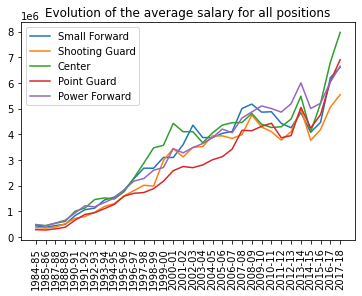

In [131]:
# Plotting in a graph the evolution of average salary per position
for pos in [x for x in df['main_position'].unique() if x != 'nan']:
    df_plt = df1[df1['main_position']==pos].groupby(['YEAR'])['salary'].mean()
    plt.plot(df_plt,label = '%s'%pos)
plt.legend()
plt.title(f"Evolution of the average salary for all positions")
plt.xticks(rotation=90)
plt.show()

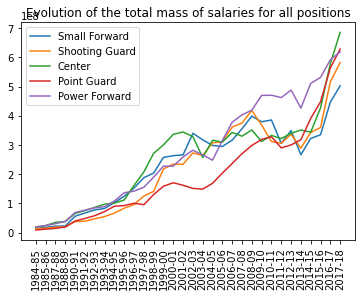

In [132]:
#Plotting in a graph the evolution of the total mass of salaries per position
for pos in [x for x in df['main_position'].unique() if x != 'nan']:
    df_plt = df1[df1['main_position']==pos].groupby(['YEAR'])['salary'].sum()
    plt.plot(df_plt,label = '%s'%pos)
plt.legend()
plt.title(f"Evolution of the total mass of salaries for all positions")
plt.xticks(rotation=90)
plt.show()

In [133]:
# Getting points from 3P shots
df1['PTS_FROM_3P'] = df1['FG3M'] * 3

In [134]:
# Grouping points and points from 3P shots by year
pts = df1.groupby(['YEAR'])[['PTS_FROM_3P','PTS']].sum()
# Obtaining % of total points scored from 3P shots
pts['PCT_3P_TOTAL'] = 100 * pts['PTS_FROM_3P'] / pts['PTS']
pts.reset_index(inplace=True)

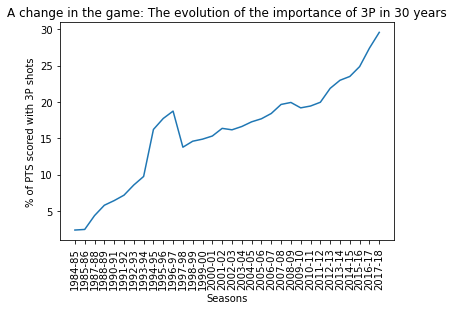

In [135]:
# Plotting % of total points scored from 3P shots
plt.plot(pts['YEAR'],pts['PCT_3P_TOTAL'])
plt.title("A change in the game: The evolution of the importance of 3P in 30 years")
plt.xlabel("Seasons")
plt.ylabel("% of PTS scored with 3P shots")
plt.xticks(rotation=90)
plt.show()

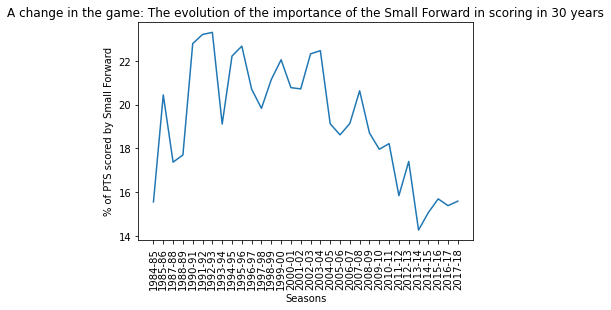

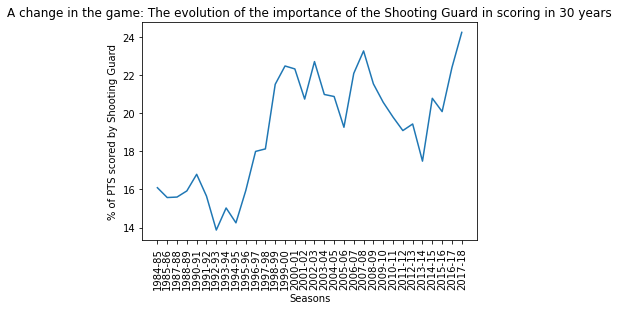

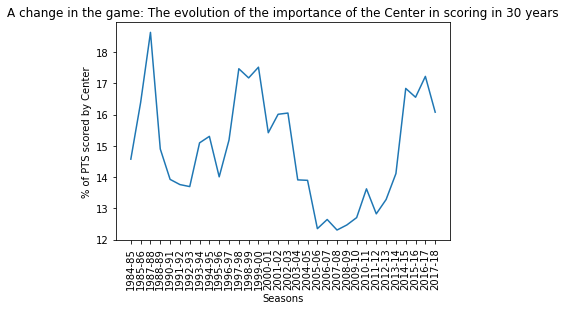

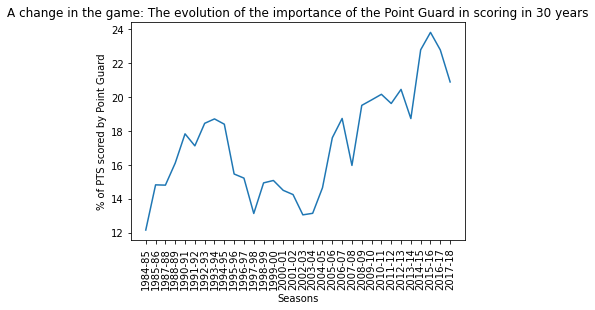

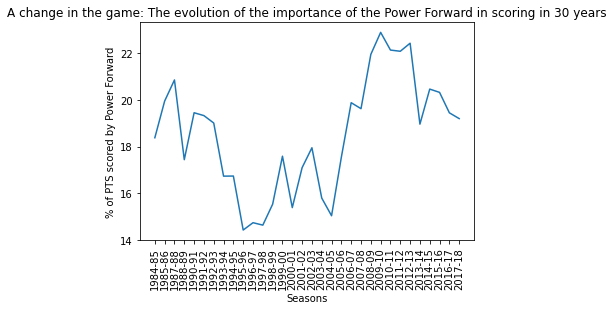

In [136]:
# Doing the same exercise by position.
for pos in [x for x in df1['main_position'].unique() if x != 'nan']:
    pts_by_position = df1.groupby(['YEAR','main_position'])[['PTS_FROM_3P','PTS']].sum()
    #pts['PCT_3P_TOTAL'] = 100 * pts['PTS_FROM_3P'] / pts['PTS']
    pts_by_position.reset_index(inplace=True)
    pts_pg = pts_by_position[pts_by_position['main_position']==pos]
    pts_pg.reset_index(inplace=True)
    timeseries_lst = [pts_pg['YEAR'],pts_pg['PTS'],pts['PTS']]
    pts['PTS'].reset_index()
    pg_total_pts = pd.concat(timeseries_lst,axis=1,keys=['YEAR','PG_PTS','PTS'])
    pg_total_pts['PCT_PG_TOTAL'] = 100 * pg_total_pts['PG_PTS'] / pg_total_pts['PTS']
    pg_total_pts.reset_index(inplace=True)
    plt.plot(pg_total_pts['YEAR'],pg_total_pts['PCT_PG_TOTAL'])
    plt.title(f"A change in the game: The evolution of the importance of the {pos} in scoring in 30 years")
    plt.xlabel("Seasons")
    plt.ylabel(f"% of PTS scored by {pos}")
    plt.xticks(rotation=90)
    plt.show()

### Is the Team Topscorer the player who earns the most in the team?

In [140]:
df2 = df[["PLAYER","team_full_name","GP","MIN","PTS","YEAR","salary"]] #choosing necessary columns

In [141]:
df2.columns = df2.columns.str.lower() # lower the column names

In [142]:
df2.rename(columns={"team_full_name":"team"},inplace=True) #change the column name to team

In [143]:
df2["avg_pts"] = df2["pts"] / df2["gp"] # calculate the avg points

In [144]:
df2.head()

,player,team,gp,min,pts,year,salary,avg_pts
0,Michael Jordan,Chicago Bulls,82,3144,2313,1984-85,550000.0,28.207317
1,Orlando Woolridge,Chicago Bulls,77,2816,1767,1984-85,300000.0,22.948052
2,Quintin Dailey,Chicago Bulls,79,2101,1262,1984-85,410000.0,15.974684
3,Steve Johnson,Chicago Bulls,74,1659,743,1984-85,369000.0,10.040541
4,Dave Corzine,Chicago Bulls,82,2062,701,1984-85,660000.0,8.548780


**Evolution of Total Salary**

In [145]:
group_salary= pd.DataFrame(df2.groupby("year")["salary"].sum()) #groupby to calculate total salary each season

In [146]:
group_salary.reset_index(inplace=True)

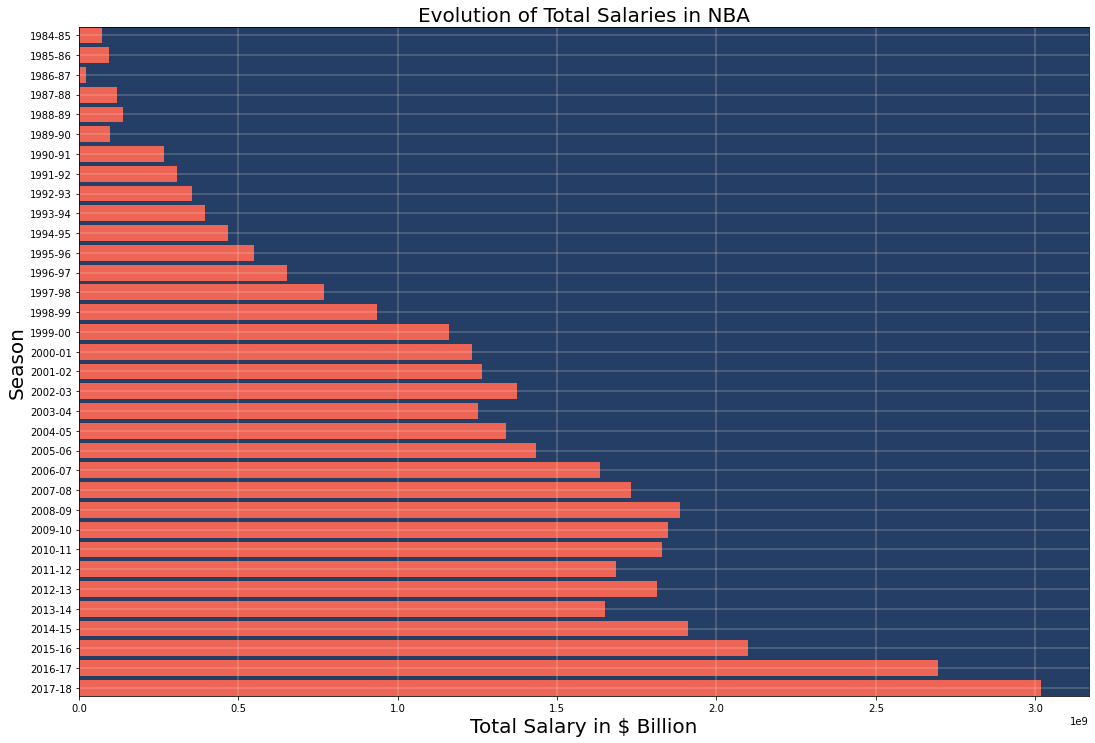

In [147]:
plt.figure(figsize=(15,10)) #set the figure size
plt.barh(group_salary["year"],group_salary["salary"],color='#EF6555') #prepare the barh plot with RGB color
plt.tight_layout()
plt.gca().invert_yaxis() #invert the y axis to start from 1984-85
plt.title("Evolution of Total Salaries in NBA",fontsize=20) #write the title and its size
plt.margins(y=0) #remove the empty padding
ax = plt.gca()
ax.set_facecolor("#253E66") # set the background color
plt.xlabel("Total Salary in $ Billion",fontsize=20) 
plt.ylabel("Season",fontsize=20)
plt.grid(color="#E3DFD7", linewidth=2,alpha=0.2) #prepare the grid
plt.show()

**Highest Paid Player as % of Total Salary**

In [148]:
#groupby for each teams total salary and highest paid player every year
cap = df2.groupby(["year","team"])[["salary","avg_pts"]].agg(["sum","max"]).reset_index()

In [149]:
# edit the column names
cap.columns = ["year","team","salary_sum","salary_max","avg_pts_sum","avg_pts_max"]

In [150]:
cap["salary_pct"] = (cap["salary_max"] / cap["salary_sum"])*100 #calculate the salary percentage

In [151]:
cap.head()

,year,team,salary_sum,salary_max,avg_pts_sum,avg_pts_max,salary_pct
0,1984-85,Atlanta Hawks,2874000.0,678000.0,142.591202,27.370370,23.590814
1,1984-85,Boston Celtics,6134000.0,1800000.0,130.339320,28.687500,29.344636
2,1984-85,Chicago Bulls,3424000.0,660000.0,119.887819,28.207317,19.275701
3,1984-85,Cleveland Cavaliers,1713000.0,475000.0,122.174282,22.492958,27.729130
4,1984-85,Dallas Mavericks,2755000.0,800000.0,117.943039,25.687500,29.038113


In [152]:
cap.drop(cap[(cap["year"]=="1986-87") | (cap["year"]=="1989-90")].index,inplace=True) #drop these years as there is no enough data

In [153]:
cap

,year,team,salary_sum,salary_max,avg_pts_sum,avg_pts_max,salary_pct
0,1984-85,Atlanta Hawks,2874000.0,678000.0,142.591202,27.370370,23.590814
1,1984-85,Boston Celtics,6134000.0,1800000.0,130.339320,28.687500,29.344636
2,1984-85,Chicago Bulls,3424000.0,660000.0,119.887819,28.207317,19.275701
3,1984-85,Cleveland Cavaliers,1713000.0,475000.0,122.174282,22.492958,27.729130
4,1984-85,Dallas Mavericks,2755000.0,800000.0,117.943039,25.687500,29.038113
...,...,...,...,...,...,...,...
955,2017-18,Sacramento Kings,74681917.0,12307692.0,127.940428,14.525424,16.480150
956,2017-18,San Antonio Spurs,113237104.0,21461010.0,137.051387,23.133333,18.952277
957,2017-18,Toronto Raptors,107446207.0,28703704.0,129.087133,23.000000,26.714488
958,2017-18,Utah Jazz,103986101.0,21974719.0,132.429771,20.455696,21.132362


In [154]:
#write a function takes team as parameter
def salary_pct(df=cap,team="Boston Celtics"):
    cap[cap["team"]=="Boston Celtics"].plot(x="year",y="salary_pct",figsize=(10,5),color='#EF6555',linestyle="dashed",linewidth=3)
    plt.title("Highest Paid Player in Total Salary in " + team,fontsize=10)
    plt.xlabel("Season",fontsize=10)
    plt.ylabel("Percentage",fontsize=10)
    ax = plt.gca()
    ax.set_facecolor("#253E66")
    plt.grid(color="#E3DFD7", linewidth=2,alpha=0.2)
    plt.show()

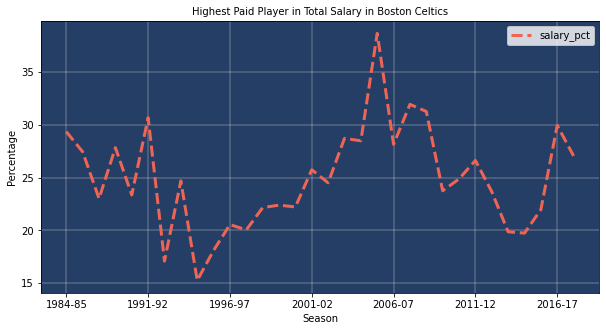

In [155]:
salary_pct()

**Percentage salary of the top scorer**

In [156]:
a = df2.groupby(["year","team"])["avg_pts","salary"].max().reset_index() #get the avg_pts and salary max for each team and year

In [157]:
a["lookup"] = a["year"] + a["team"] #create a lookup value to prepare for merge

In [158]:
a

,year,team,avg_pts,salary,lookup
0,1984-85,Atlanta Hawks,27.370370,678000.0,1984-85Atlanta Hawks
1,1984-85,Boston Celtics,28.687500,1800000.0,1984-85Boston Celtics
2,1984-85,Chicago Bulls,28.207317,660000.0,1984-85Chicago Bulls
3,1984-85,Cleveland Cavaliers,22.492958,475000.0,1984-85Cleveland Cavaliers
4,1984-85,Dallas Mavericks,25.687500,800000.0,1984-85Dallas Mavericks
...,...,...,...,...,...
955,2017-18,Sacramento Kings,14.525424,12307692.0,2017-18Sacramento Kings
956,2017-18,San Antonio Spurs,23.133333,21461010.0,2017-18San Antonio Spurs
957,2017-18,Toronto Raptors,23.000000,28703704.0,2017-18Toronto Raptors
958,2017-18,Utah Jazz,20.455696,21974719.0,2017-18Utah Jazz


In [159]:
a = a[["lookup","avg_pts"]]

In [160]:
a.rename(columns={"avg_pts":"avg_max"},inplace=True)

In [161]:
a #there is only our lookup value avg_pts of top scorer each year

,lookup,avg_max
0,1984-85Atlanta Hawks,27.370370
1,1984-85Boston Celtics,28.687500
2,1984-85Chicago Bulls,28.207317
3,1984-85Cleveland Cavaliers,22.492958
4,1984-85Dallas Mavericks,25.687500
...,...,...
955,2017-18Sacramento Kings,14.525424
956,2017-18San Antonio Spurs,23.133333
957,2017-18Toronto Raptors,23.000000
958,2017-18Utah Jazz,20.455696


In [162]:
df2["lookup"] = df2["year"] + df2["team"]

In [163]:
df2

,player,team,gp,min,pts,year,salary,avg_pts,lookup
0,Michael Jordan,Chicago Bulls,82,3144,2313,1984-85,550000.0,28.207317,1984-85Chicago Bulls
1,Orlando Woolridge,Chicago Bulls,77,2816,1767,1984-85,300000.0,22.948052,1984-85Chicago Bulls
2,Quintin Dailey,Chicago Bulls,79,2101,1262,1984-85,410000.0,15.974684,1984-85Chicago Bulls
3,Steve Johnson,Chicago Bulls,74,1659,743,1984-85,369000.0,10.040541,1984-85Chicago Bulls
4,Dave Corzine,Chicago Bulls,82,2062,701,1984-85,660000.0,8.548780,1984-85Chicago Bulls
...,...,...,...,...,...,...,...,...,...
14501,Solomon Hill,New Orleans Pelicans,12,187,29,2017-18,12236535.0,2.416667,2017-18New Orleans Pelicans
14502,Larry Drew II,New Orleans Pelicans,10,70,17,2017-18,148318.0,1.700000,2017-18New Orleans Pelicans
14503,Walt Lemon Jr.,New Orleans Pelicans,5,35,17,2017-18,92160.0,3.400000,2017-18New Orleans Pelicans
14504,Charles Cooke,New Orleans Pelicans,13,38,6,2017-18,NaN,0.461538,2017-18New Orleans Pelicans


In [164]:
b = pd.merge(df2,a,on="lookup") #merge df and a on lookup

In [165]:
b["diff"] = b["avg_pts"] - b["avg_max"] #extract avg_max from avg_pst whereever there is 0 will be our top scorer and we will need to extract his salary

In [166]:
b = b[b["diff"]==0]

In [167]:
cap["lookup"] = cap["year"] + cap["team"]

In [168]:
cap

,year,team,salary_sum,salary_max,avg_pts_sum,avg_pts_max,salary_pct,lookup
0,1984-85,Atlanta Hawks,2874000.0,678000.0,142.591202,27.370370,23.590814,1984-85Atlanta Hawks
1,1984-85,Boston Celtics,6134000.0,1800000.0,130.339320,28.687500,29.344636,1984-85Boston Celtics
2,1984-85,Chicago Bulls,3424000.0,660000.0,119.887819,28.207317,19.275701,1984-85Chicago Bulls
3,1984-85,Cleveland Cavaliers,1713000.0,475000.0,122.174282,22.492958,27.729130,1984-85Cleveland Cavaliers
4,1984-85,Dallas Mavericks,2755000.0,800000.0,117.943039,25.687500,29.038113,1984-85Dallas Mavericks
...,...,...,...,...,...,...,...,...
955,2017-18,Sacramento Kings,74681917.0,12307692.0,127.940428,14.525424,16.480150,2017-18Sacramento Kings
956,2017-18,San Antonio Spurs,113237104.0,21461010.0,137.051387,23.133333,18.952277,2017-18San Antonio Spurs
957,2017-18,Toronto Raptors,107446207.0,28703704.0,129.087133,23.000000,26.714488,2017-18Toronto Raptors
958,2017-18,Utah Jazz,103986101.0,21974719.0,132.429771,20.455696,21.132362,2017-18Utah Jazz


In [169]:
final = pd.merge(b,cap,on="lookup")

In [170]:
final["pct"] = (final["salary"] / final["salary_sum"]) * 100

In [171]:
final = final[["year_x","player","team_x","salary","avg_pts","avg_max","salary_sum","salary_max","salary_pct","pct"]]

In [172]:
final.rename(columns={"year_x":"year","team_x":"team","salary":"topscorer_salary","salary_pct":"salary_pct_max","pct":"topscorer_salary_pct"},inplace=True)

In [173]:
#checking only the evoluiton of top scorer's salary share in total salary for each team
def scorer_pct(df=final,team="Boston Celtics"):
    final[final["team"]==team].plot(x="year",y="topscorer_salary_pct",figsize=(10,5),color='#EF6555',linestyle="dashed",linewidth=3)
    plt.title("Salary Percentage of Top Scorer Player in " + team,fontsize=10)
    plt.xlabel("Season",fontsize=10)
    plt.ylabel("Percentage",fontsize=10)
    ax = plt.gca()
    ax.set_facecolor("#253E66")
    plt.grid(color="#E3DFD7", linewidth=2,alpha=0.2)
    plt.show()

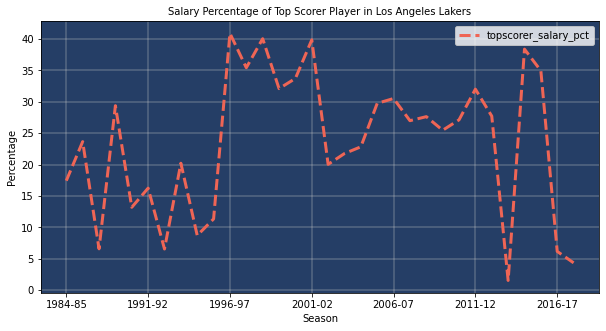

In [174]:
scorer_pct(team="Los Angeles Lakers")

**Checking Top Scorer Salary and Max Salary within Total Salary**

In [175]:
final

,year,player,team,topscorer_salary,avg_pts,avg_max,salary_sum,salary_max,salary_pct_max,topscorer_salary_pct
0,1984-85,Michael Jordan,Chicago Bulls,550000.0,28.207317,28.207317,3424000.0,660000.0,19.275701,16.063084
1,1985-86,Michael Jordan,Chicago Bulls,630000.0,22.666667,22.666667,4486000.0,806000.0,17.967008,14.043691
2,1987-88,Michael Jordan,Chicago Bulls,845000.0,34.975610,34.975610,5014330.0,845000.0,16.851703,16.851703
3,1988-89,Michael Jordan,Chicago Bulls,2000000.0,32.506173,32.506173,6785000.0,2000000.0,29.476787,29.476787
4,1990-91,Michael Jordan,Chicago Bulls,2500000.0,31.463415,31.463415,10040000.0,2500000.0,24.900398,24.900398
...,...,...,...,...,...,...,...,...,...,...
905,2013-14,Anthony Davis,New Orleans Pelicans,5375760.0,20.805970,20.805970,62186089.0,14283844.0,22.969517,8.644634
906,2014-15,Anthony Davis,New Orleans Pelicans,5607240.0,24.352941,24.352941,68452322.0,14898938.0,21.765424,8.191453
907,2015-16,Anthony Davis,New Orleans Pelicans,7070730.0,24.278689,24.278689,80028253.0,15514031.0,19.385692,8.835292
908,2016-17,Anthony Davis,New Orleans Pelicans,22116750.0,27.986667,27.986667,91095627.0,22116750.0,24.278608,24.278608


In [176]:
#is the top scorer of the team is also having the max share?
def vs(df=final,team="Boston Celtics"):
    final[final["team"]==team].plot(x="year",y=["topscorer_salary_pct","salary_pct_max"],figsize=(10,5),color=['#EECD86',"#B95835"],linestyle="dashed",linewidth=3)
    plt.title("Salary of Top Scorer vs Max Salary in " + team,fontsize=10)
    plt.xlabel("Season",fontsize=10)
    plt.ylabel("Percentage",fontsize=10)
    ax = plt.gca()
    ax.set_facecolor("#3D3242")
    plt.grid(color="#7A3E48", linewidth=2,alpha=0.2)
    plt.show()

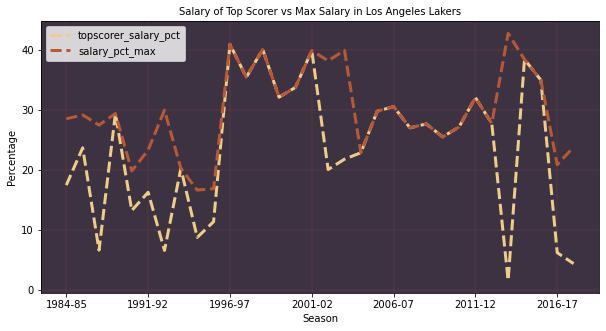

In [177]:
vs(team="Los Angeles Lakers")